In [76]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


df = pd.read_csv(r'C:\Users\SUBHASH\Downloads\archive\movies.csv')

In [67]:
#let's look into our data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
#let's check if there is any null values in this table or not

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col,pct_missing))

In [ ]:
#check for the datatypes
df.dtypes

In [ ]:
#changing the datatype of budget and gross


#df = df.astype({"budget":'integer', "gross":'integer'})
#pd.to_numeric(df['budget'], downcast='integer')

#df[['gross']] = df[['gross']].apply(pd.to_numeric)
df = df.astype({"gross": np.int64})
df['budget'] = df['budget'].astype('int64')

#df["gross"] = df["gross"].astype("int64")
#df.gross = df.gross.astype(int)

In [ ]:
for col in df.columns:
    print(df[col].isnull().value_counts(), "\n")

In [ ]:
df.head()

In [77]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
df = df.dropna()

In [ ]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)



In [ ]:
df =df.sort_values(by=['gross'],inplace =False, ascending =False)

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df.drop_duplicates()

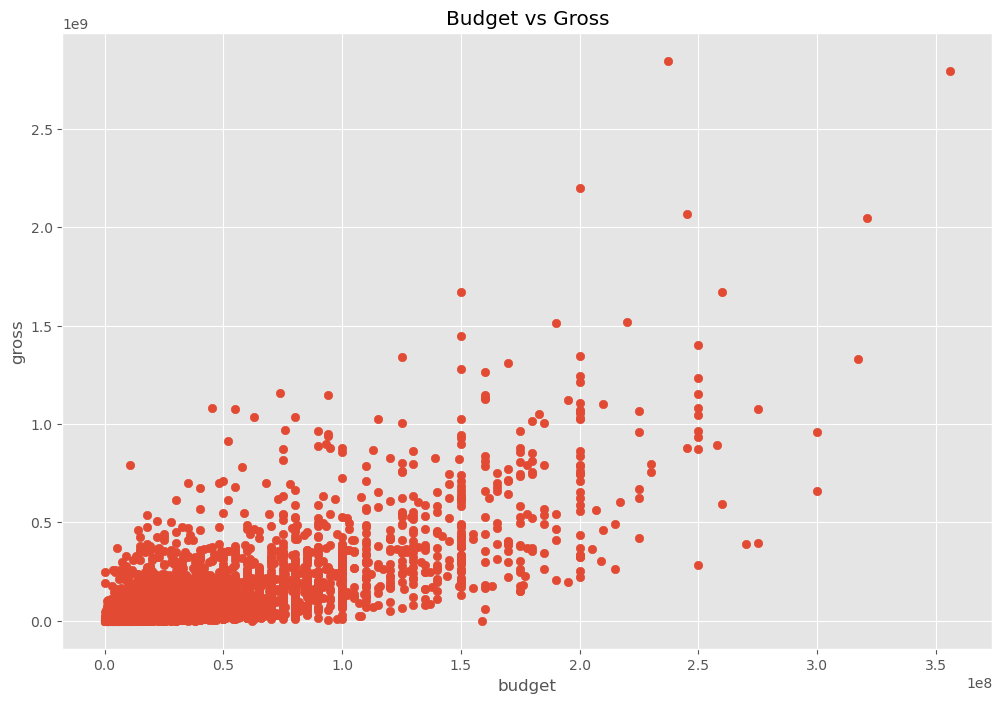

In [74]:
#correlation between budget and gross
#higher the budget higher the gross will be


plt.scatter(x=df['budget'] , y= df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('budget')
plt.ylabel('gross')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

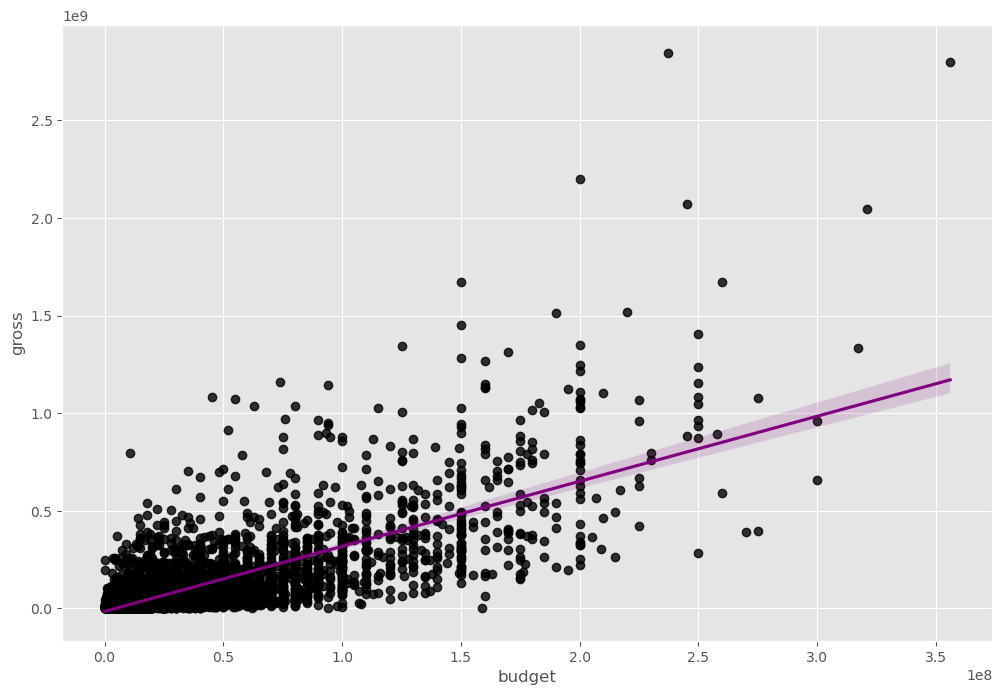

In [73]:
#plot using seaborn
sns.regplot(x='budget', y='gross',data = df,scatter_kws ={"color" : "black"},line_kws ={"color" : "purple"}) 


In [ ]:
df.corr(method ='pearson')

In [72]:
corr_matrix= df.corr(method='pearson')

Text(120.72222222222221, 0.5, 'Movies features')

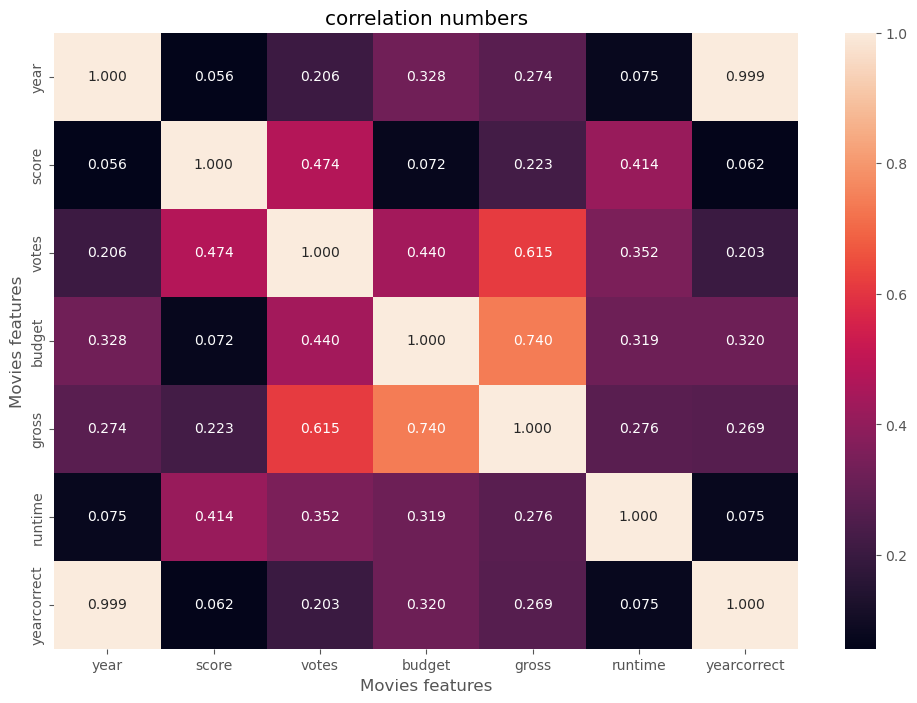

In [71]:
sns.heatmap(corr_matrix,annot= True,fmt=".3f")

plt.title("correlation numbers")
plt.xlabel("Movies features")
plt.ylabel("Movies features")

In [70]:
#convert name to number 
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object' or df_numerized[col_name].dtype == 'category'):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [ ]:
df.head()

In [ ]:
corr_matrix2 = df_numerized.corr(method= 'pearson')

sns.heatmap(corr_matrix2,annot= True,fmt=".3f")

plt.title("correlation numbers 2")
plt.xlabel("Movies features 2")
plt.ylabel("Movies features 2")
plt.show()

In [ ]:
correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()
sorted_way = corr_pairs.sort_values()
sorted_way

In [69]:
high = sorted_way[(sorted_way >0.5)]
high

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#we were wrong with out hypothesis which was of budget and gross 
# here votes and gross has the highest corr_index 


<AxesSubplot:xlabel='votes', ylabel='gross'>

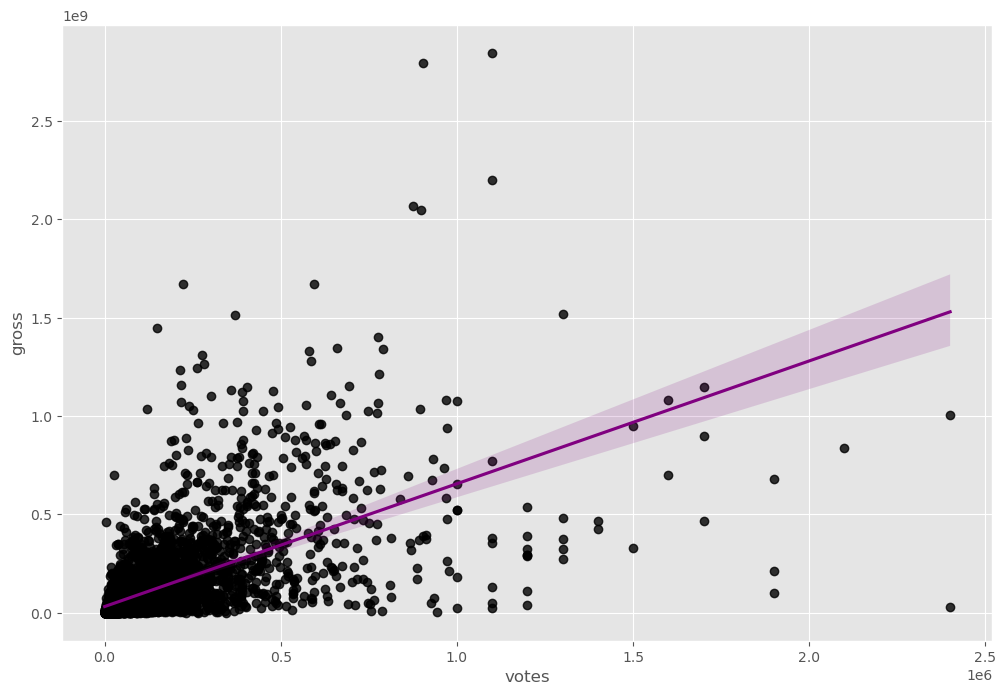

In [68]:
sns.regplot(x='votes', y='gross',data = df_numerized,scatter_kws ={"color" : "black"},line_kws ={"color" : "purple"}) 
